# Gaussian Quadrature

Gaussian quadrature is a numerical integration technique that allows us to approximate certain integrals of certain functions with a fairly high degree of accuracy. This tutorial will show how to implement Gaussian quadrature in python.

Suppose that we wish to integrate a differentiable real-valued function $f$ over some interval $[a,b]$. We stress that the function $f$ must be differentiable in order for Gaussian quadrature to be a good approximation. First, we can make a change of variables so that we integrate over $[-1,1]$. This is done purely for simplicity. By the change of variable $$x = \frac{b-a}{2}s + \frac{b+a}{2},$$ we have that $$\int_a^bf(x)dx = \frac{b-a}{2}\int_{-1}^1f\left(\frac{b-a}{2}s + \frac{b+a}{2}\right)ds.$$ Once again, to simplify notation, let $$g(s) = f\left(\frac{b-a}{2}s + \frac{b+a}{2}\right).$$

The main idea of Gaussian quadrature is that we can choose finitely many points $s_1, s_2, \dots, s_n$ in the interval $[-1,1]$ and finitely many weights $w_1, w_2, \dots, w_n$ so that $$\int_{-1}^1g(s)ds \approx \sum_{i=1}^nw_ig(s_i).$$ From this, we can approximate our desired integral by $$\int_a^bf(x)dx \approx \frac{b-a}{2}\sum_{i=1}^nw_if\left(\frac{b-a}{2}s_i + \frac{b+a}{2}\right).$$ We can simplify the notation a little by definining $$x_i = \frac{b-a}{2}s_i + \frac{b+a}{2}.$$ Then $$\int_a^bf(x)dx \approx \frac{b-a}{2}\sum_{i=1}^nw_if(x_i).$$

The weights $s_1, \dots, s_n$ and points $w_1, \dots, w_n$ are chosen so that whenever $f$ is a polynomial of degree at most $2n-1$, the quadrature approximation is actually exact. We list the points and weights for the $n=1$ (exact for degree $1$ polynomials), $n=2$ (exact for degree $3$ polynomials), and $n=3$ (exact for degree $5$ polynomials) cases below. Higher order Gaussian quadrature weights and points can be found on the Wikipedia page for Gaussian quadrature at https://en.wikipedia.org/wiki/Gaussian_quadrature.

|n|points|weights|
|---|---|---|
|1|s_1 = 0|w_1 = 2|
|2|s_1=-1/sqrt(3), s_2 = 1/sqrt(3)|w_1 = 1, w_2 = 1|
|3|s_1 = -sqrt(3/5), s_2 = 0, s_3 = sqrt(3/5)|w_1 = 5/9, w_2 = 8/9, w_3 = 5/9|

Now, we will show how to implement Gaussian quadrature in Python. As an example, we will first compute the integral of $f(x) = 2x$ over $[0,1]$. The exact answer should be $$\int_{0}^12xdx = 1.$$ Next, we will compute $f(x) = 3x^2$ over $[-1,1]$. The exact answer should be $$\int_{-1}^13x^2dx = 2.$$ Finally, we will compute the integral of $f(x) = (3\pi/2)\cos(\pi x)$ over $[-1/2,1/2]$. The exact answer should be $$\int_{-1/2}^{1/2}(3\pi/2)\cos(\pi x)dx = 3.$$

In [1]:
import numpy

def f1(x): return 2*x

def f2(x): return 3*x**2

def f3(x): return 3*numpy.pi/2*numpy.cos(numpy.pi*x)

def gauss1(f,a,b):
    return (b-a)*f((b+a)/2)

def gauss2(f,a,b):
    x1 = (b-a)/2*(-1/numpy.sqrt(3)) + (b+a)/2
    x2 = (b-a)/2*(1/numpy.sqrt(3)) + (b+a)/2
    return (b-a)/2*(f(x1) + f(x2))

def gauss3(f,a,b):
    x1 = (b-a)/2*(-numpy.sqrt(3/5)) + (b+a)/2
    x2 = (b+a)/2
    x3 = (b-a)/2*(numpy.sqrt(3/5)) + (b+a)/2
    return (b-a)/2*(5/9*f(x1) + 8/9*f(x2) + 5/9*f(x3))

print("f(x) = 2x")
print("gauss1(f,0,1) =",gauss1(f1,0,1))
print("gauss2(f,0,1) =",gauss2(f1,0,1))
print("gauss3(f,0,1) =",gauss3(f1,0,1))
print()
print("f(x) = 3x**2")
print("gauss1(f,-1,1) =",gauss1(f2,-1,1))
print("gauss2(f,-1,1) =",gauss2(f2,-1,1))
print("gauss3(f,-1,1) =",gauss3(f2,-1,1))
print()
print("f(x) = (3pi/2)*cos(pi*x)")
print("gauss1(f,-1/2,1/2) =", gauss1(f3,-1/2,1/2))
print("gauss2(f,-1/2,1/2) =", gauss2(f3,-1/2,1/2))
print("gauss3(f,-1/2,1/2) =", gauss3(f3,-1/2,1/2))

f(x) = 2x
gauss1(f,0,1) = 1.0
gauss2(f,0,1) = 1.0
gauss3(f,0,1) = 1.0

f(x) = 3x**2
gauss1(f,-1,1) = 0.0
gauss2(f,-1,1) = 2.0000000000000004
gauss3(f,-1,1) = 2.0000000000000004

f(x) = (3pi/2)*cos(pi*x)
gauss1(f,-1/2,1/2) = 4.71238898038469
gauss2(f,-1/2,1/2) = 2.903729361976705
gauss3(f,-1/2,1/2) = 3.0020833704116145


As we can see, both the first order ($n=1$), second order ($n=2$), and third order ($n=3$) Gaussian quadrature rules give exact answers for integrating $f(x) = 2x$. On the other hand, only the second and third order rule give an (essentially) exact answer for $f(x) = 3x^2$, while the first order rule isn't even close. All three quadrature rules give errors for integrating $f(x) = (3\pi/2)\cos(\pi x)$, but the second order rule is significantly more accurate than the first order rule while the third order rule is only marginally more accurate than the second order rule. The moral of the story is that, when choosing a quadrature rule, one should only choose a high enough order rule to reach a desired accuracy. Using extremely high order quadrature rules gives minimal improvements to accuracy.

We now know how to implement Gaussian quadrature for a differentiable real-valued function $f$ on an interval $[a,b]$. However, most functions that we encounter in practice may not be differentiable on an entire interval $[a,b]$ that we wish to integrate over. 

A common example of such a function is a piecewise linear function. More explicitly, suppose that we are given data points $(t_1,y_1), \dots, (t_m,y_m)$ where $a \leq t_1 < t_2 < \cdots < t_m \leq b$. Then the piecewise linear interpolant $g$ with respect to these data points is the function defined by the following property: on each subinterval $[t_i,t_{i+1}]$, $g$ is the straight line connecting the data point $(t_i,y_i)$ to $(t_{i+1}, y_{i+1})$. 

The graph of $g$ usually has sharp corners at the interpolation points $(t_i,y_i)$, and so $g$ is in general not differentiable at those points. As a result, Gaussian quadrature on the entire interval $[a,b]$ is not a good approximation to $$\int_a^bg(t)dt.$$ On the other hand, we make the following two observations:
1. If we restrict ourselves to just looking at each subinterval $[t_i,t_{i+1}]$, $g$ is just a linear function on that interval, and is definitely differentiable. As a result, Gaussian quadrature on $[t_i, t_{i+1}]$ is a good approximation to $$\int_{t_i}^{t_{i+1}}g(t)dt.$$
2. The integral of $g$ can be split up as integrals over the subintervals: $$\int_a^bg(t)dt = \sum_{i=1}^{m-1}\int_{t_i}^{t_{i+1}}g(t)dt.$$

Therefore, to approximate the integral of $g$ using Gaussian quadrature, we do the following two steps:
1. First we approximate the integral of $g$ on each subinterval: $$\int_{t_i}^{t_{i+1}}g(t)dt \approx \frac{t_{i+1}-t_i}{2}\sum_{j=1}^nw_jg\left(\frac{t_{i+1}-t_i}{2}s_j + \frac{t_i+t_{i+1}}{2}\right),$$ where the pairs $(w_j, s_j)$ are the weights and points for the $n$-th order Gaussian quadrature rule and the $t_i$ are the nodes for which $g$ is linear on each $[t_i,t_{i+1}]$. 

2. We add up all of our approximations to approximate the entire integral of $g$ on $[a,b]$: $$\int_a^bg(t)dt \approx \sum_{i=1}^{m-1}\frac{t_{i+1}-t_i}{2}\sum_{j=1}^nw_jg\left(\frac{t_{i+1}-t_i}{2}s_j + \frac{t_i+t_{i+1}}{2}\right).$$

This simple modification of first breaking up the integral over $[a,b]$ into integrals over subintervals $[t_i,t_{i+1}]$ and then applying Gaussian quadrature to each piece gives us a method to approximate the integral of piecewise linear functions $g$ on an interval $[a,b]$. In fact, this method works for any function $g$ that is simply differentiable on each subinterval $[t_i,t_{i+1}]$; $g$ does not have to be linear on these intervals.

We now know how to use Gaussian quadrature to approximate differentiable functions as well as piece-wise differentiable functions on an interval $[a,b]$. As a final example, we will compute a second order Gaussian quadrature of a piecewise linear function $g$ on $[0,1]$, first using the "wrong" method that doesn't split up the integral over the subintervals, and then using the "right" method that splits the integral over the subintervals. We define our function $g$ in such a way so that the exact integral should be $0$.

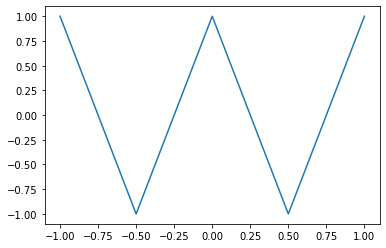

wrong integral =  0.15470053837925157
right integral =  2.7755575615628914e-17


In [14]:
import numpy
import matplotlib.pyplot
import random

ts = [-1 + 2*i/4 for i in range(0,5)]
ys = [numpy.cos(10*numpy.pi*t) for t in ts]

# we will use the numpy.interp function to define our linear interpolant g for the
# (t,y) data

def g(t): return numpy.interp(t, ts, ys)

# let's plot g to see that it is not differentiable on the entire interval [0,1]

matplotlib.pyplot.plot(ts, ys)
matplotlib.pyplot.show()

# now let's compute its integral over [0,1] the wrong way:

print("wrong integral = ", gauss2(g, 0, 1))

# now let's implement how to compute the integral the right way:

right_integral = 0
for i in range(len(ts)-1):
    right_integral += gauss2(g, ts[i], ts[i+1])

print("right integral = ", right_integral)

As we can see, not splitting up the integral can introduce significant errors into the integral computation.